In [1]:
import pandas as pd
import numpy as np

# Read a comma-separated values (csv) file into DataFrame.

The data folder contains a file named "newark_tree_data.csv". Read this file into a dataframe.


resources:
* [Pandas read csv docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)

In [2]:
# Create DataFrame here.
trees = pd.read_csv('data/newark_tree_data.csv', sep=',')

In [3]:
# Display the first few rows of the DataFrame here.
trees.head()

,ID,ON,AREA,ADDRESS,STREET,SITE,SIDE,ASSIGNED,COMMON,BOTANICAL,...,IMPROPMULC,IMPROPPRUN,NUTRIENTD,PEST,GIRDLING,STRESS,OHUTILITY,TOP_HEIGHT,CROWN_M,CROWN_DIE
0,11.0,Elan Park,Elan Park,2,Blue Hen Rg,11.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,40,0-5%,0-5%
1,12.0,Elan Park,Elan Park,2,Blue Hen Rg,12.0,Front,False,"arborvitae, eastern",Thuja occidentalis,...,False,False,False,False,False,False,No,41,0-5%,0-5%
2,13.0,Elan Park,Elan Park,2,Blue Hen Rg,13.0,Front,False,"pine, eastern white",Pinus strobus,...,False,False,False,False,True,False,No,54,0-5%,6-10%
3,14.0,Elan Park,Elan Park,2,Blue Hen Rg,14.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,57,11-15%,26-30%
4,15.0,Elan Park,Elan Park,2,Blue Hen Rg,15.0,Front,False,"whitecedar, Atlantic",Chamaecyparis thyoides,...,False,False,False,False,True,False,No,55,11-15%,21-25%


In [4]:
# How many columns does the DataFrame contain?
trees.shape
#54 columns

(4193, 54)

In [5]:
# What attributes (columns) does this DataFrame contain?
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4193 non-null   float64
 1   ON          4193 non-null   object 
 2   AREA        4169 non-null   object 
 3   ADDRESS     4193 non-null   int64  
 4   STREET      4193 non-null   object 
 5   SITE        4193 non-null   float64
 6   SIDE        4193 non-null   object 
 7   ASSIGNED    4193 non-null   bool   
 8   COMMON      4193 non-null   object 
 9   BOTANICAL   4193 non-null   object 
 10  CULTIVAR    113 non-null    object 
 11  DBH         4193 non-null   float64
 12  REMOVAL     434 non-null    object 
 13  STEMS       4193 non-null   float64
 14  COND        4087 non-null   object 
 15  MAINTPRIM   101 non-null    object 
 16  OBSERVE     0 non-null      float64
 17  INSPECT     4193 non-null   bool   
 18  LOCATION    4193 non-null   object 
 19  NOTES       1114 non-null  

Upon reviewing the columns of the DataFrame, we see that there is already a column named ID that is well suited for an index column.  

For the purposes of this lab, we are only going to need a few of the available attributes. The attributes we wish to keep are listed below:
* ID
* UNIQUEID
* COMMON
* BOTANICAL
* COND
* RISK
* HEIGHT

Let's provide the index_col and the usecols args when we invoke the read_csv method.

In [10]:
# Create the new DataFrame here
new_trees = pd.read_csv('data/newark_tree_data.csv', usecols=['ID', 'UNIQUEID', 'COMMON', 'BOTANICAL', 'COND', 'RISK', 'HEIGHT'])

In [11]:
# Display the first few rows of the new DataFrame here.
new_trees.head()

,ID,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
0,11.0,"arborvitae, eastern",Thuja occidentalis,Good,Low,LM 20150929141218,40
1,12.0,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,LM 20150929141418,40
2,13.0,"pine, eastern white",Pinus strobus,Good,Low,LM 20150929141844,54
3,14.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929142424,56
4,15.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929143018,55


The data narritive specifies that 4,193 sites were inventoried. Use the DataFrame shape attribute to verify the number of rows.

In [13]:
# How many rows does your DataFrame contain.
new_trees.shape

(4193, 7)

Let's look at the distribution of data for the HEIGHT attribute.

In [25]:
row = new_trees[new_trees['HEIGHT']==0]
print(row)

          ID COMMON BOTANICAL COND RISK           UNIQUEID  HEIGHT
118    119.0  stump     stump  NaN  NaN  LM 20151001093501       0
119    120.0  stump     stump  NaN  NaN  LM 20151001093612       0
268    269.0  stump     stump  NaN  NaN  LM 20151005101319       0
269    270.0  stump     stump  NaN  NaN  LM 20151005101403       0
270    271.0  stump     stump  NaN  NaN  LM 20151005101436       0
...      ...    ...       ...  ...  ...                ...     ...
4094  4095.0  stump     stump  NaN  NaN  SR 20151103154447       0
4148  4149.0  stump     stump  NaN  NaN  SR 20151104115722       0
4166  4167.0  stump     stump  NaN  NaN  SR 20151104142636       0
4167  4168.0  stump     stump  NaN  NaN  SR 20151104142704       0
4174  4175.0  stump     stump  NaN  NaN  SR 20151104151721       0

[106 rows x 7 columns]


In [17]:
# What is the min height?
new_trees['HEIGHT'].min()

0

In [18]:
# What is the max height?
new_trees['HEIGHT'].max()

140

,ID,COMMON,BOTANICAL,COND,RISK,UNIQUEID,HEIGHT
0,11.0,"arborvitae, eastern",Thuja occidentalis,Good,Low,LM 20150929141218,40
1,12.0,"arborvitae, eastern",Thuja occidentalis,Very Good,Low,LM 20150929141418,40
2,13.0,"pine, eastern white",Pinus strobus,Good,Low,LM 20150929141844,54
3,14.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929142424,56
4,15.0,"whitecedar, Atlantic",Chamaecyparis thyoides,Fair,Low,LM 20150929143018,55


In [29]:
# How do we acquire count, mean, standard deviation, and distribution information from the DataFrame 
# by invoking a single method?
new_trees['HEIGHT'].describe()

count    4193.000000
mean       55.311472
std        36.293489
min         0.000000
25%        23.000000
50%        50.000000
75%        86.000000
max       140.000000
Name: HEIGHT, dtype: float64

# Plot a histogram using the HEIGHT attribute. 

resources:
* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
* [Pandas Series Hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist)

In [33]:
# Apply magic command to display matplotlib images inline
%matplotlib inline
import matplotlib.pyplot as plt

0       40
1       40
2       54
3       56
4       55
        ..
4188    50
4189    55
4190    45
4191    80
4192    70
Name: HEIGHT, Length: 4193, dtype: int64

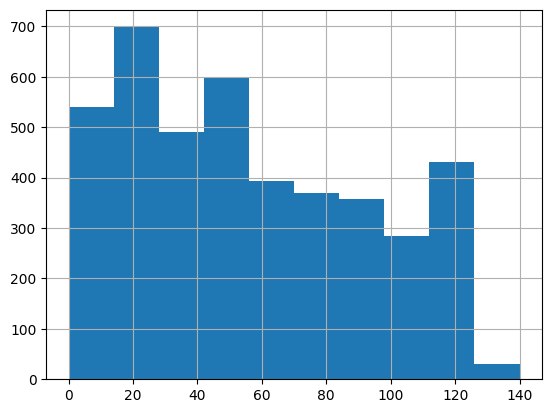

In [36]:
# Create a histogram using the HEIGHT attribute here
height_hist = new_trees['HEIGHT'].hist()

The data narrative specifies the following:
"A total of 4,193 sites were inventoried, including 4,087 trees, 100 stumps, and 6 vacant planting sites"

Earlier, we were able to validate the total number of entries in the DataFrame. Let's now dig in a bit deeper and validate the stumps and vacant planting sites.

In [46]:
row = new_trees[new_trees.HEIGHT == 0]
print(row)

          ID COMMON BOTANICAL COND RISK           UNIQUEID  HEIGHT
118    119.0  stump     stump  NaN  NaN  LM 20151001093501       0
119    120.0  stump     stump  NaN  NaN  LM 20151001093612       0
268    269.0  stump     stump  NaN  NaN  LM 20151005101319       0
269    270.0  stump     stump  NaN  NaN  LM 20151005101403       0
270    271.0  stump     stump  NaN  NaN  LM 20151005101436       0
...      ...    ...       ...  ...  ...                ...     ...
4094  4095.0  stump     stump  NaN  NaN  SR 20151103154447       0
4148  4149.0  stump     stump  NaN  NaN  SR 20151104115722       0
4166  4167.0  stump     stump  NaN  NaN  SR 20151104142636       0
4167  4168.0  stump     stump  NaN  NaN  SR 20151104142704       0
4174  4175.0  stump     stump  NaN  NaN  SR 20151104151721       0

[106 rows x 7 columns]


In [53]:
# How many entries are stumps
stumps = len(new_trees[new_trees.BOTANICAL == 'stump'])
print(stumps)

100


In [80]:
# How many entries are vacant sites
vac = len(new_trees[new_trees['HEIGHT']==0])
vac - stumps


6

In [ ]:
# Do these number add up?
#no

# Plot a bar graph using the COND attribute.

resources:
* [Pandas Series Bar](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html#pandas.Series.plot.bar)

In [88]:
# How can we determine all of the possible values describing the condition of a tree and their associated counts?
order = new_trees['COND'].value_counts()

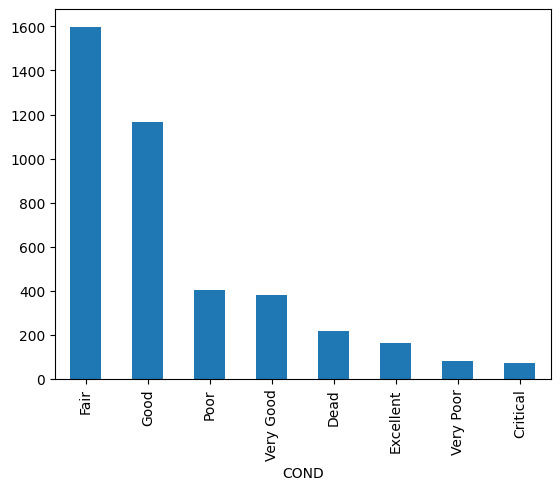

In [91]:
# Were these already in the order you would want them to be in order for a graph to make sense? 
# If not, reorder  the Series.
order.plot.bar()
plt.show()

In [ ]:
# Plot the Series here


In [96]:
# How many entries have missing values for the COND attribute? Why are these values missing
new_trees[new_trees['COND'].isnull()].count()

ID           106
COMMON       106
BOTANICAL    106
COND           0
RISK           0
UNIQUEID     106
HEIGHT       106
dtype: int64

# Plot a pie chart using the RISK attribute.

resources:
* [Pandas Series Pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.pie.html#pandas.Series.plot.pie)
* [matplotlib pie chart docs](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

In [103]:
# How can we determine all of the possible values describing the RISK associated with each tree
# along with the corresponding row counts?
risk = new_trees['RISK'].value_counts()

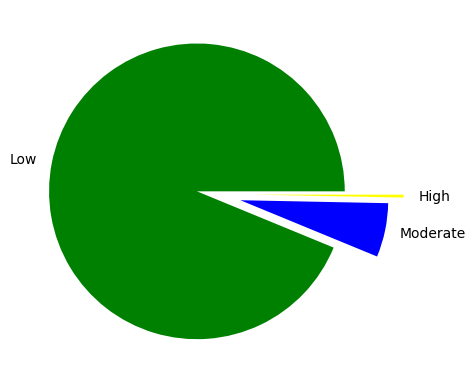

In [113]:
# Create an array containing the colors green, yellow, and orange
# When we create our pie chart, the colors should be associated with the attributes according to the specifications below:
# Green -> Low
# Yellow -> Moderate
# Orange -> High
plt.pie(risk, labels=risk.index, colors=['green','blue','yellow'], explode=[0.1, 0.2, 0.3])
plt.show()


In [114]:
# Plot the pie chart here

ID           106
COMMON       106
BOTANICAL    106
COND           0
RISK           0
UNIQUEID     106
HEIGHT       106
dtype: int64

In [119]:
# How many entries have missing values for the RISK attribute? Why are these values missing?
new_trees[new_trees['RISK'].isnull()].count()

ID           106
COMMON       106
BOTANICAL    106
COND           0
RISK           0
UNIQUEID     106
HEIGHT       106
dtype: int64

# Indexing

In [121]:
# Display row by position 1
new_trees.iloc[1]

ID                          12.0
COMMON       arborvitae, eastern
BOTANICAL     Thuja occidentalis
COND                   Very Good
RISK                         Low
UNIQUEID       LM 20150929141418
HEIGHT                        40
Name: 1, dtype: object

In [ ]:
# Display row by label 1
